In [1]:
import pickle
import torch
import tensorflow as tf
from kobert_transformers import get_kobert_model
import numpy as np
import pandas as pd
from kobert_transformers import get_tokenizer
import datetime

In [2]:
# tf.debugging.set_log_device_placement(True) 
#코드 실행 전에 추가해주면 연산을 할때 어떤 장치에 할당 되었는지 확인할 수 있음

In [3]:
with open('news_normalized_2.pickle', 'rb') as file:
    data = pickle.load(file)

In [4]:
data.head()

,id,title,date,body,summary,link,body_stem,summary_stem,site
0,1,"이총리 ""폭염, 특별재난 준해…전기요금 제한적 특별배려 검토""",2018.07.31. 오전 11:53,"국무회의 주재···체계적 폭염대책 주문""최저임금 명암···변화 수용하되 진통 최소화...",이낙연 국무총리는 31일 계속되는 폭염으로 전기요금 부담에 대한 우려가 커지고 있는...,https://news.naver.com/main/ranking/read.nhn?r...,"[국무회의, 주재···체계적, 폭염대책, 주문, 최저임금, 명암···변화, 수용, ...","[이낙연, 국무총리, 31일, 계속, 폭염, 전기요금, 부담, 우려, 관련, 전기요...",naver
1,2,"김성태 ""盧 탄핵때도 기무사 대응문건 의혹…즉시 제출하라""",2018.07.31. 오전 10:25,"""대통령, 여름휴가 때 노동자·소상공인 생각하길""김성태 자유한국당 원내대표. = 김...","김성태 자유한국당 원내대표는 31일 ""지난 2004년 노무현 전 대통령 탄핵 당시 ...",https://news.naver.com/main/ranking/read.nhn?r...,"[대통령, 여름휴가, 노동자·소상공, 생각하길""김성태, 자유한국당, 원내대표, 김성...","[김성태, 자유한국당, 원내대표, 31, 2004년, 노무현, 대통령, 탄핵, 당시...",naver
2,3,"합참, 北 ICBM 제작 정황 보도에 ""면밀히 추적·감시중""",2018.07.31. 오전 11:29,"노재천 공보실장 ""공식확인 부적절···한미간 공조""워싱턴포스트 ""액화연료 사용 IC...",합동참모본부는 31일 북한이 대륙간탄도미사일을 만들고 있는 정황을 포착했다는 보도와...,https://news.naver.com/main/ranking/read.nhn?r...,"[노재천, 공보실장, 공식확인, 부적절···한미간, 공조""워싱턴포스트, 액화연료, ...","[합동참모본부, 31, 북한, 대륙간탄도미사일, 정황, 포착, 보도, 관련해, 언급...",naver
3,4,"기무사 ""盧 대통령 탄핵 당시 계엄검토 문건 작성 안해""",2018.07.31. 오후 2:43,김성태 의원 주장에 반박···지난 정부에서도 관련 내용 확인 국방부 특별수사단이 계...,국군기무사령부는 31일 노무현 전 대통령 탄핵 당시 계엄령 문건을 작성했다는 김성태...,https://news.naver.com/main/ranking/read.nhn?r...,"[김성태, 의원, 주장, 반박···지난, 정부, 에서도, 관련, 내용, 확인, 국방...","[국군기무사령부, 31일, 노무현, 대통령, 탄핵, 당시, 계엄령, 문건, 작성, ...",naver
4,5,"'종전문제 다룰까' 北, 이례적 회담 제의 이어 전향적 태도 보여",2018.07.31. 오후 12:55,"안익산 대표 "" 흔들어 종전선언? 보도, 그럴 수 있다"" 이해 안익산 북측 수석대표...",북한이 이례적으로 남북 장성급 군사회담을 먼저 제의한데 이어 회담에서 전향적인 태도...,https://news.naver.com/main/ranking/read.nhn?r...,"[안익산, 대표, 흔들, 종전선언, 보도, 이해, 안익산, 북측, 수석대표, 31일...","[북한, 이례적, 남북, 장성급, 군사회담, 먼저, 제의한데, 회담, 전향적, 태도...",naver


## 메모리가없어...13만개로 줄여보기

In [5]:
data = data[-130000:]

#### 본문 정수인코딩 + padding

In [6]:
bmorphs = data.body_stem

In [7]:
l=[]
m = 300
cnt= 0
for n,_ in enumerate(bmorphs):
    if len(_)>m:
        l.append(n)
        cnt+=1

In [8]:
cnt

18285

In [9]:
tok = get_tokenizer()

In [10]:
bodytok = []
for _ in bmorphs:
    bid = tok.convert_tokens_to_ids(_)
    if(len(bid)<300):
        new = bid+[1]*(300-len(bid)) #padded part = 1
    elif(len(bid)>300):
        new = bid[:300]
    bodytok.append(new)       

In [11]:
print(len(bodytok[1]))
print(bodytok[1])

300
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7337, 0, 0, 0, 0, 6273, 0, 0, 6255, 0, 0, 0, 0, 0, 0, 7180, 0, 0, 6256, 6733, 0, 7180, 0, 7476, 0, 0, 0, 0, 7954, 0, 0, 0, 0, 0, 0, 7369, 0, 0, 0, 6256, 0, 110, 0, 0, 0, 0, 6556, 0, 6255, 0, 0, 6300, 0, 0, 0, 0, 0, 0, 0, 7829, 0, 0, 0, 6008, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6909, 6255, 0, 0, 0, 0, 0, 0, 6597, 0, 0, 0, 7829, 0, 0, 0, 0, 0, 0, 0, 7229, 0, 7218, 7063, 0, 5801, 0, 0, 7180, 0, 7829, 0, 0, 0, 5782, 0, 0, 0, 0, 6004, 0, 0, 0, 0, 0, 6267, 0, 7829, 0, 0, 0, 0, 0, 0, 7337, 0, 0, 6415, 7298, 7337, 0, 0, 7949, 0, 0, 0, 0, 6415, 7298, 0, 7337, 0, 0, 5619, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7829, 5516, 0, 0, 0, 0, 0, 0, 0, 6422, 0, 0, 0, 0, 0, 7063, 7230, 5430, 0, 0, 0, 0, 5417, 0, 0, 5477, 6255, 0, 0, 6738, 0, 0, 0, 0, 0, 7012, 0, 6367, 7430, 7369, 0, 0, 6415, 0, 5619, 0, 0, 0, 5575, 0, 6256, 5873, 0, 0, 0, 6256, 7114, 0, 0, 6255, 0, 0, 0, 0, 7725, 0, 0, 0, 6729, 0, 0, 0, 6255, 0, 0, 0, 6256, 0, 6378, 0, 0, 0, 0, 0, 0, 0, 7848, 0, 0, 0, 0, 0, 0, 579

In [12]:
encoder_input = np.array(bodytok)
encoder_input.shape

(130000, 300)

#### summary 정수인코딩 + padding

In [13]:
smorphs = data.summary_stem

In [14]:
smorphs = smorphs.apply(lambda x : ['sos']+x+['eos'])

In [15]:
smorphs.head()

70000    [sos, 인도양, 마다가스카르, 근처, 바다, 연구용, 포획, 뱀상어, 몸, 결혼...
70001    [sos, 유효좌석, 킬로미터, 당, 비용, 항공업계, 효율성, 측정, 기준, 20...
70002    [sos, 삼성전자, 폴더블, 폰, 갤럭시, 폴드', 8일, 중국, 출시, 후, 온...
70003    [sos, 삼성전자, 폴더블폰, 갤럭시, 폴드, 중국에서, 출시, 5분, 완판되, ...
70004    [sos, 삼성전자, 폴더블, 스마트폰, 갤럭시, 폴드', 중국, 온라인, 매장, ...
Name: summary_stem, dtype: object

In [16]:
l=[]
m = 100
cnt= 0
for n,_ in enumerate(smorphs):
    if len(_)>m:
        l.append(n)
        cnt+=1

In [17]:
cnt

64

In [18]:
l[:5]

[652, 721, 1575, 1692, 2777]

In [19]:
tok = get_tokenizer()

just to check unique words

In [20]:
tmp = []
for _ in smorphs:
    el_id = tok.convert_tokens_to_ids(_)
    tmp.append(el_id)       

In [21]:
hi = set()
for lst in tmp:
    for _ in lst:
        if _ not in hi:
            hi.add(_)

In [22]:
print(hi)

{0, 9, 13, 15, 40, 42, 45, 46, 49, 50, 51, 54, 60, 63, 64, 65, 68, 71, 73, 75, 77, 79, 82, 83, 85, 86, 87, 88, 89, 90, 91, 93, 97, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 122, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,

In [23]:
hi2 = set()
for lst in bodytok:
    for _ in lst:
        if _ not in hi2:
            hi2.add(_)

In [24]:
print(hi2)

{0, 1, 9, 11, 13, 15, 18, 40, 41, 42, 45, 46, 47, 49, 50, 51, 52, 53, 54, 59, 60, 63, 64, 65, 68, 71, 73, 75, 77, 79, 82, 83, 85, 86, 87, 88, 89, 90, 91, 93, 97, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 122, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 253, 254, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304

초반에는 sos를 8002, eos를 8003으로 뒀었다. 그러나 추후 임베딩 시 해당 해당 인덱스를 인식못하는 에러가 발생했다 . 따라서 둘 다에 존재하지 않는 2,3에 sos,eos를 둬도 될것같다.

sos=2, eos=3  
unknown = 0  
padded part = 1

body 길이 = 300  
summary 길이 = 100

In [25]:
summarytok = []
for _ in smorphs:
    el_id = tok.convert_tokens_to_ids(_)
    el_id[0] = 2 #sos
    el_id[-1] = 3 #eos
    if(len(el_id)<100):
        new = el_id+[1]*(100-len(el_id)) #padded part = 1
    elif(len(el_id)>100):
        new = el_id[:100]
        new[-1] = 3 #eos
    summarytok.append(new)       

In [26]:
print(len(summarytok[1]))
print(summarytok[1])

100
[2, 0, 0, 5804, 6446, 0, 0, 0, 5581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7659, 0, 7581, 5822, 0, 0, 0, 105, 0, 6170, 0, 0, 5572, 7957, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
print(len(summarytok[289]))
print(summarytok[289])

100
[2, 0, 0, 0, 0, 0, 0, 0, 5916, 0, 0, 6637, 0, 0, 0, 0, 0, 0, 0, 0, 7404, 7125, 6510, 0, 0, 0, 5432, 0, 0, 0, 0, 0, 0, 7743, 0, 0, 0, 0, 0, 0, 0, 0, 5431, 6956, 0, 0, 0, 5431, 0, 0, 5431, 6305, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
hi = set()
for lst in summarytok:
    for _ in lst:
        if _ not in hi:
            hi.add(_)

In [29]:
len(hi) #num of words in summary

2017

In [30]:
decoder_input = np.array(summarytok)

In [31]:
decoder_input.shape

(130000, 100)

추후 encoder_input / decoder_input 은 embedding을 통해 3Dtensor로 변환

In [32]:
MAX_LEGNTH = 300 #for padding
NUM_WORDS = 2017 #본문 기사 내 가장 많이 사용된 3000단어?(or 전체 단어수로 할지 미정)
VECTOR_SIZE = 768
MAX_SUMMARIZATION_LENGTH = 100

#### Make decoder output (For dense layer)

In [33]:
mapping = dict()
for n,_ in enumerate(hi):
    mapping[n] = _

In [34]:
print(mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 9, 5: 13, 6: 15, 7: 40, 8: 42, 9: 45, 10: 46, 11: 49, 12: 50, 13: 51, 14: 54, 15: 60, 16: 63, 17: 64, 18: 65, 19: 68, 20: 71, 21: 73, 22: 75, 23: 77, 24: 79, 25: 82, 26: 83, 27: 85, 28: 86, 29: 87, 30: 88, 31: 89, 32: 90, 33: 91, 34: 93, 35: 97, 36: 101, 37: 104, 38: 105, 39: 106, 40: 107, 41: 108, 42: 109, 43: 110, 44: 111, 45: 112, 46: 113, 47: 114, 48: 115, 49: 116, 50: 119, 51: 122, 52: 124, 53: 127, 54: 128, 55: 129, 56: 130, 57: 131, 58: 132, 59: 133, 60: 134, 61: 135, 62: 136, 63: 137, 64: 138, 65: 139, 66: 140, 67: 141, 68: 142, 69: 144, 70: 145, 71: 146, 72: 147, 73: 148, 74: 149, 75: 150, 76: 151, 77: 152, 78: 153, 79: 154, 80: 155, 81: 157, 82: 160, 83: 161, 84: 162, 85: 163, 86: 164, 87: 165, 88: 166, 89: 167, 90: 168, 91: 169, 92: 170, 93: 171, 94: 172, 95: 175, 96: 176, 97: 177, 98: 178, 99: 179, 100: 180, 101: 181, 102: 182, 103: 183, 104: 184, 105: 185, 106: 186, 107: 187, 108: 188, 109: 190, 110: 191, 111: 192, 112: 193, 113: 194, 114: 195, 

In [35]:
list(mapping.keys())[list(mapping.values()).index(8000)]

2016

In [75]:
decoder_target = np.zeros((130000,MAX_SUMMARIZATION_LENGTH,NUM_WORDS),dtype='float32')

In [76]:
for i, target in enumerate(summarytok):
    for n, word in enumerate(target):
        decoder_target[i,n,list(mapping.keys())[list(mapping.values()).index(word)]]=1

In [40]:
decoder_target[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Split train/validation data (Ratio: 0.1)

In [77]:
encoder_input.shape

(130000, 300)

In [78]:
decoder_input.shape

(130000, 100)

In [79]:
decoder_target.shape

(130000, 100, 2017)

In [80]:
#80/20
enc_train = encoder_input[:104000]
enc_val = encoder_input[104000:]

dec_in_train = decoder_input[:104000]
dec_in_val = decoder_input[104000:]

dec_out_train = decoder_target[:104000]
dec_out_val = decoder_target[104000:]

In [81]:
print(enc_train.shape, enc_val.shape)
print(dec_in_train.shape, dec_in_val.shape)
print(dec_out_train.shape, dec_out_val.shape)

(104000, 300) (26000, 300)
(104000, 100) (26000, 100)
(104000, 100, 2017) (26000, 100, 2017)


### Train Model

In [36]:
MAX_LEGNTH = 300 
NUM_WORDS = 2017 
VECTOR_SIZE = 768
MAX_SUMMARIZATION_LENGTH = 100

In [37]:
pytorch_kobert_model = get_kobert_model()

In [38]:
def kobert_convert(integer_encoding, kobert_model):
  '''정수 인코딩된 자료를 pytorch kobert 모델 통과해서 tensorflow의 tensor로 변환'''
  return tf.convert_to_tensor(kobert_model(torch.LongTensor(integer_encoding))[0].detach())

In [39]:
from keras import Model
from keras.layers import Embedding, LSTM, Dropout, Input, Dense, dot, concatenate
from keras.optimizers import Adam

In [50]:
class Seq2Seq_Attention():
    def __init__(self):
        self.max_length = 300
        self.VECTOR_SIZE = 768
        self.max_summary_length = 100
        self.num_words = 2017
        
        self.sos =  2
        self.eos =  3
        
        self.optimizer = Adam()
        
        encoder_inputs = Input(shape=(self.max_length,self.VECTOR_SIZE))
        decoder_inputs = Input(shape=(self.max_summary_length,self.VECTOR_SIZE))
        
        self.att = self.build_att()

        self.att.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=self.optimizer)
        print(self.att.summary())
        
        
    def build_att(self):
        def lstm(inputs, hs, seq=True, initial=None):
            output,h,c = LSTM(hs, return_state=True, return_sequences=seq)(inputs, initial_state=initial) 
            #return_seq=False & return_state=True: return only last h, c
            #return_seq=Ture & return_state=True: return all h, c
            return output, h, c
        
        def fc(n_h_layers, inputs, hn):
            for _ in range(n_h_layers):
                d = Dense(hn, activation='tanh')(inputs)
            if n_h_layers==0: 
                d = inputs
            output = Dense(hn, activation='softmax')(d)
            #모든 2064개 단어에 대한 확률값 (해당 위치에서의)
            return output
        
        #(encoder input) already embedded from koBERT(vector size 만큼)
        encoder_inputs = Input(shape=(self.max_length,self.VECTOR_SIZE))
        encoder_outputs, h, c = lstm(encoder_inputs, 256)  #Discard encoder outputs
        print(encoder_outputs)
        init_states = [h,c]
        
        decoder_inputs = Input(shape=(self.max_summary_length,self.VECTOR_SIZE))
        decoder_outputs, _, _ = lstm(decoder_inputs, 256, initial=init_states) #Discard encoder outputs
        
        value = Dense(5000, activation='tanh')(encoder_outputs)
        query = Dense(5000, activation='tanh')(decoder_outputs)
        print(value, query) #300x5000 두개
        
        attention = dot([query, value],axes=[2,2])
        print(attention) #300x300
        
        attention_softmaxed = fc(0, attention, self.max_length)
        print(attention_softmaxed) #300x300
        print(encoder_outputs)
        
        weighted = dot([attention_softmaxed, encoder_outputs], axes=[2,1]) #give weights to encoder outputs(=각 토큰)
        print(attention_softmaxed)
        
        print(weighted)
        
        decoder_for_final = concatenate([weighted, decoder_outputs]) #weighted token(2064x256) + decoder output(2064x256)
        #or add? 둘중에 성능좋은거 고르기
        
        decoder_final = fc(1, decoder_for_final, self.num_words)
        print(decoder_final)
        
        mod = Model([encoder_inputs, decoder_inputs], decoder_final) 
        return mod
    
    

    #Get train/val data of batch size
    def load_batch(self, batch_size=64):
        
        self.n_batches = int(50000/batch_size)
        val_size = int(batch_size*0.2)
        
        for i in range(self.n_batches):
            #train data
            batch_e = enc_train[i*batch_size:(i+1)*batch_size]
            batch_d = dec_in_train[i*batch_size:(i+1)*batch_size]
            batch_d_o = dec_out_train[i*batch_size:(i+1)*batch_size]
                        
            #val data
            val_e = enc_val[i*val_size:(i+1)*val_size]
            val_d = dec_in_val[i*val_size:(i+1)*val_size]
            val_d_o = dec_out_val[i*val_size:(i+1)*val_size]    

            yield batch_e, batch_d, batch_d_o, val_e, val_d, val_d_o
    
    
    #train model
    def train(self, epochs, batch_size = 64):
        train_losses = []
        train_acc = []
        
        val_losses = []
        val_acc = []
        
        start_time = datetime.datetime.now()
        
        for epoch in range(epochs):
            for batch_i, (enc_batch, dec_batch, dec_out_batch, enc_val, dec_val, dec_out_val) in enumerate(self.load_batch(batch_size)):
                
                enc_batch = kobert_convert(enc_batch, pytorch_kobert_model)
                dec_batch = kobert_convert(dec_batch, pytorch_kobert_model)
                
                enc_val = kobert_convert(enc_val, pytorch_kobert_model)
                dec_val = kobert_convert(dec_val, pytorch_kobert_model)
                
                enc_batch = np.array(enc_batch)
                dec_batch = np.array(dec_batch)
                dec_out_batch = np.array(dec_out_batch)
                
                enc_val = np.array(enc_val)
                dec_val = np.array(dec_val)
                dec_out_val = np.array(dec_out_val)
                
                if batch_i==0:
                    print(enc_batch.shape, dec_batch.shape, dec_out_batch.shape, enc_val.shape, dec_val.shape, dec_out_val.shape)
                
                
                hist = self.att.train_on_batch([enc_batch, dec_batch], dec_out_batch)
                valhist = self.att.test_on_batch([enc_val, dec_val], dec_out_val)
                
                train_losses.append(hist[0])
                train_acc.append(hist[1])
                
                val_losses.append(valhist[0])
                val_acc.append(valhist[1])            
            
                elapsed_time = datetime.datetime.now() - start_time
                
                if batch_i%100==0:
                    print("Time Elapsed %s [Epoch %d/%d] [Batch %d/%d] Train Loss: %04f Train Acc:%04f Valid Loss: %04f Valid Acc:%04f"\
                          %(elapsed_time, epoch, epochs, batch_i, self.n_batches, hist[0], hist[1], valhist[0], valhist[1]))
                    
        return train_losses, train_acc, val_losses, val_acc

In [51]:
model = Seq2Seq_Attention()

Tensor("lstm/Identity:0", shape=(None, 300, 256), dtype=float32)
Tensor("dense/Identity:0", shape=(None, 300, 5000), dtype=float32) Tensor("dense_1/Identity:0", shape=(None, 100, 5000), dtype=float32)
Tensor("dot/Identity:0", shape=(None, 100, 300), dtype=float32)
Tensor("dense_2/Identity:0", shape=(None, 100, 300), dtype=float32)
Tensor("lstm/Identity:0", shape=(None, 300, 256), dtype=float32)
Tensor("dense_2/Identity:0", shape=(None, 100, 300), dtype=float32)
Tensor("dot_1/Identity:0", shape=(None, 100, 256), dtype=float32)
Tensor("dense_4/Identity:0", shape=(None, 100, 2017), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 768)]   0                                            
_______________________________________________________________________________________

In [52]:
train_losses, train_accs, val_losses, val_accs = model.train(epochs=10, batch_size=128)

(128, 300, 768) (128, 100, 768) (128, 100, 2017) (25, 300, 768) (25, 100, 768) (25, 100, 2017)
Time Elapsed 0:00:54.204865 [Epoch 0/10] [Batch 0/390] Train Loss: 7.614541 Train Acc:0.000000 Valid Loss: 4.559106 Valid Acc:0.557600
Time Elapsed 1:08:52.894008 [Epoch 0/10] [Batch 100/390] Train Loss: 1.000873 Train Acc:0.863516 Valid Loss: 0.998096 Valid Acc:0.876400
Time Elapsed 2:16:36.495333 [Epoch 0/10] [Batch 200/390] Train Loss: 0.857499 Train Acc:0.870625 Valid Loss: 0.909592 Valid Acc:0.865200
Time Elapsed 3:24:14.110206 [Epoch 0/10] [Batch 300/390] Train Loss: 0.657047 Train Acc:0.893438 Valid Loss: 0.728843 Valid Acc:0.886800
(128, 300, 768) (128, 100, 768) (128, 100, 2017) (25, 300, 768) (25, 100, 768) (25, 100, 2017)
Time Elapsed 4:25:03.119149 [Epoch 1/10] [Batch 0/390] Train Loss: 0.722283 Train Acc:0.885859 Valid Loss: 0.786115 Valid Acc:0.873600
Time Elapsed 5:32:39.725273 [Epoch 1/10] [Batch 100/390] Train Loss: 0.655802 Train Acc:0.891328 Valid Loss: 0.639183 Valid Acc:0

In [190]:
pd.Series(train_losses).to_pickle('train_losses.pkl')
pd.Series(train_accs).to_pickle('train_accs.pkl')
pd.Series(val_losses).to_pickle('val_losses.pkl')
pd.Series(val_accs).to_pickle('val_accs.pkl')

In [194]:
len(val_accs)

3900

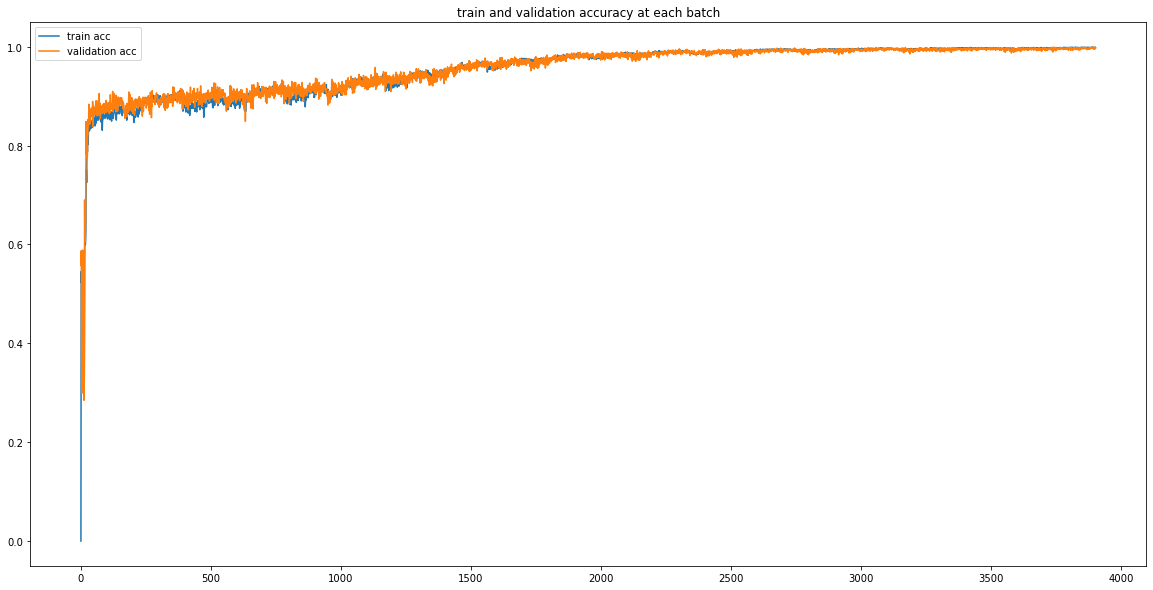

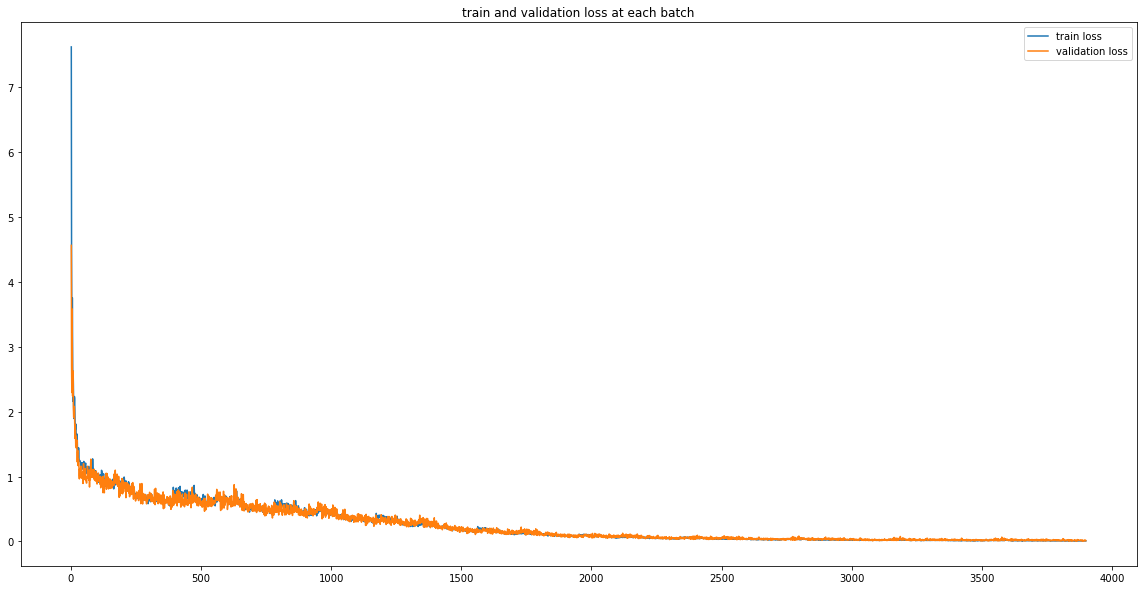

In [202]:
import matplotlib.pyplot as plt
batches = range(1,len(train_accs)+1)

plt.figure(figsize=(20,10))
plt.plot(batches,train_accs,label='train acc')
plt.plot(batches,val_accs,label='validation acc')
plt.title('train and validation accuracy at each batch')
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(batches,train_losses,label='train loss')
plt.plot(batches,val_losses,label='validation loss')
plt.title('train and validation loss at each batch')
plt.legend()

plt.show()

## Save Model

In [53]:
M_json = model.att.to_json()
with open("attention.json","w") as file:
    file.write(M_json)
model.att.save_weights("attention_weights.h5")

## Load Model

In [40]:
from keras.models import model_from_json
file = open('attention.json','r')
model = file.read()
file.close()
attention = model_from_json(model)
attention.load_weights("attention_weights.h5")

In [41]:
attention.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 768)]   0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100, 768)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 300, 256), ( 1049600     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 100, 256), ( 1049600     input_4[0][0]                    
                                                                 lstm[0][1]                   

#### 임시로 train data 결과값 확인

In [42]:
kobert_convert(decoder_input[0].reshape((1,100)), pytorch_kobert_model)

<tf.Tensor: shape=(1, 100, 768), dtype=float32, numpy=
array([[[-0.11886912,  0.17363535,  0.00075889, ..., -0.5482324 ,
          0.01986812,  0.0507892 ],
        [-0.11617672,  0.16292201, -0.00958603, ..., -0.5495447 ,
          0.01741494,  0.05710211],
        [-0.11663948,  0.16399257, -0.00854061, ..., -0.54917574,
          0.01814788,  0.05857695],
        ...,
        [-0.11969046,  0.16776615, -0.0050863 , ..., -0.54930747,
          0.02287437,  0.04979758],
        [-0.11996687,  0.16764525, -0.00491042, ..., -0.5493341 ,
          0.02246382,  0.04990508],
        [-0.11984725,  0.16685793, -0.00530766, ..., -0.5494972 ,
          0.02198456,  0.05028126]]], dtype=float32)>

In [43]:
a = kobert_convert(encoder_input[0].reshape((1,300)), pytorch_kobert_model)
b = kobert_convert(decoder_input[0].reshape((1,100)), pytorch_kobert_model)          

In [84]:
decoder_target[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
correct = list(map(int,[np.where(r==1)[0][0] for r in decoder_target[0]]))

In [86]:
print([tok.convert_ids_to_tokens(x) for x in correct])

['[CLS]', '[UNK]', '[UNK]', '[UNK]', '▁걸어', '[UNK]', '[UNK]', '[UNK]', '▁개척', '^', '[UNK]', '▁120', '[UNK]', '▁국내외', '▁끌었다', '▁닮은', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '▁논', '▁교통', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '▁그녀', '[UNK]', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [48]:
with tf.device('/device:GPU:1'):
    prediction = attention.predict([a,b])

In [49]:
prediction

array([[[6.9921642e-22, 6.4599420e-36, 1.0000000e+00, ...,
         1.0417494e-37, 0.0000000e+00, 0.0000000e+00],
        [9.9995911e-01, 1.1301057e-16, 1.0178804e-11, ...,
         2.9233385e-19, 1.5561753e-23, 1.2903971e-20],
        [9.9999201e-01, 6.9395920e-17, 5.8221704e-14, ...,
         2.1573166e-19, 4.1923994e-22, 1.0357558e-18],
        ...,
        [8.5236068e-11, 1.0000000e+00, 1.6348669e-16, ...,
         2.0774784e-16, 1.7377193e-16, 4.5953415e-12],
        [1.0145537e-10, 1.0000000e+00, 1.9261455e-16, ...,
         2.1722591e-16, 1.9165734e-16, 5.6933746e-12],
        [2.0465289e-10, 1.0000000e+00, 1.1426104e-16, ...,
         2.0138760e-16, 1.7563597e-16, 7.8754694e-12]]], dtype=float32)

In [50]:
arg = []
for _ in prediction:
    for i in _:
        arg.append(np.argmax(i))

In [51]:
print(arg)

[2, 0, 0, 0, 893, 0, 0, 0, 853, 364, 0, 540, 0, 1140, 1362, 1606, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1498, 1112, 0, 0, 0, 0, 1190, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [52]:
arg = list(map(int,arg))

In [53]:
tok.convert_ids_to_tokens(arg[0])

'[CLS]'

In [188]:
print([tok.convert_ids_to_tokens(x) for x in arg])

['[CLS]', '[UNK]', '[UNK]', '[UNK]', '▁걸어', '[UNK]', '[UNK]', '[UNK]', '▁개척', '^', '[UNK]', '▁120', '[UNK]', '▁국내외', '▁끌었다', '▁닮은', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '▁논', '▁교통', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '▁그녀', '[UNK]', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


## 유튜브 자료에 적용

In [54]:
kbs = pd.read_csv('kbs.csv')
kbs.head()

,Unnamed: 0,published_time,video_id,video_url,crawling_time,author,title,length,rating,views,...,captions,description,comments,cleaned_description,each_comments_sentiment,average_comments_sentiment,comments_sentiment_label,comments_sentiment_result,stemmed,token_ids
0,0,2020-08-16 12:58:37,oOc86DShCSk,https://www.youtube.com/watch?v=oOc86DShCSk,2020-08-24 18:09:29,KBS News,[앵커의 눈] 출렁이는 민심에 지지율 롤러코스터…여야 속사정은? / KBS뉴스(News),251.0,3.947368,1443.0,...,"[{'text': '4 180 돼 103', 'start': 0.9, 'durati...","180 대 103, 지난 총선에서 더불어민주당과 미래통합당이 받아든 성적표입니다. ...","['사랑제일교회신자 코러나확진자 치료거부하셰요 죽든지말든지~~', '도경안 슈퍼맨 ...","180 대 103, 지난 총선에서 더불어민주당과 미래통합당이 받아든 성적표입니다. ...","[0.9148726463317871, 0.16447807848453522, 0.95...",0.503928,긍정적,긍정적인 댓글 50.4%,"['180', '대', '103', '지나', '총선', '에서', '더불어민주당'...","[0, 5808, 0, 0, 0, 6903, 0, 5468, 0, 7096, 628..."
1,1,2020-08-16 13:11:37,WpJRiZRQw1Y,https://www.youtube.com/watch?v=WpJRiZRQw1Y,2020-08-24 18:09:41,KBS News,“일단은 살아만 있어요”…성폭력 피해자 돕는 ‘연대자D’ / KBS뉴스(News),134.0,5.000000,974.0,...,[{'text': '이렇듯 주변 시선 때문에 성폭력 피해자들이 제 목소리를 내는 건...,이렇듯 주변 시선 때문에 성폭력 피해자들이 제 목소리를 내는 건 쉬운 일이 아닙니다...,"['피해자들을 응원하는 것은 당연한 일이다. 지지합니다.', '너무 대단하신 일하시...",이렇듯 주변 시선 때문에 성폭력 피해자들이 제 목소리를 내는 건 쉬운 일이 아닙니다...,"[0.6021339297294617, 0.5577778220176697, 0.626...",0.476486,부정적,부정적인 댓글 52.4%,"['이렇', '주변', '시선', '때문', '에', '성폭력', '피해자들', '...","[0, 0, 0, 0, 6896, 0, 0, 7096, 7199, 7095, 0, ..."
2,2,2020-08-16 17:34:23,59GVv892SNs,https://www.youtube.com/watch?v=59GVv892SNs,2020-08-24 18:09:56,KBS News,“네가 유난스러운 거야”…침묵 강요당하는 성폭력 피해자 / KBS뉴스(News),139.0,4.047619,1451.0,...,"[{'text': '4 다음 소식입니다 참아라 당신이 윤한 스러운 거다', 'sta...","""참아라"", ""당신이 유난스러운 거다."" \n성폭력 피해자들이 겪는 2차 가해 중 ...","['성폭행 성추행은 정신병에 변태\n근절해야됩니다', '진짜, 인간들 신뢰 할게 못...","참아라 , 당신이 유난스러운 거다. 성폭력 피해자들이 겪는 2차 가해 중 이른바 사...","[0.13210418820381165, 0.660544216632843, 0.081...",0.286455,부정적,부정적인 댓글 71.4%,"['참', '당신', '이', '유난', '스럽', '거', '이', '성폭력', ...","[7398, 0, 7096, 0, 6669, 5377, 7096, 0, 0, 709..."
3,3,2020-08-16 21:32:11,nGAl4pOgYGE,https://www.youtube.com/watch?v=nGAl4pOgYGE,2020-08-24 18:10:33,KBS News,수도권 등교 인원 1/3제한…대학도 비대면 수업 권고 / KBS뉴스(News),138.0,4.000000,523.0,...,[{'text': '여름방학이 끝나고 면서 학생들의 계약도 코앞의 얻는데 또 청천벽...,"코로나19 일일 확진자가 200명대를 훌쩍 넘기면서, 교육부가 학교와 학원 시설...",['여름방학 이제 시작인데 우리는 \n\n\n\n\n벌써 끝나간다고?ㅅㅂ?'],"코로나19 일일 확진자가 200명대를 훌쩍 넘기면서, 교육부가 학교와 학원 시설의 ...",[0.8241411447525024],0.824141,긍정적,긍정적인 댓글 82.4%,"['코로나19', '일', '이', '확진자', '가', '200명', '대', '...","[0, 7126, 7096, 0, 5330, 0, 5808, 6116, 0, 569..."
4,4,2020-08-16 21:47:54,XY4MTEIAkAg,https://www.youtube.com/watch?v=XY4MTEIAkAg,2020-08-24 18:10:53,KBS News,[전문가에게 듣는다] 코로나19 재확산…병상 확보·수능시험 계획은? / KBS뉴스(...,137.0,5.000000,758.0,...,"[{'text': '바이러스 새 확산은 여러 우려 들을 낳고 있습니다', 'star...",코로나19 확진자가 급증함에 따라 병상 부족 사태를 걱정하는 목소리가 커지고 있는데...,['0:11 방역딲꾹 ㅇㅈㄹ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,코로나19 확진자가 급증함에 따라 병상 부족 사태를 걱정하는 목소리가 커지고 있는데...,"[0.6230273842811584, 0.7534586787223816, 0.556...",0.644306,긍정적,긍정적인 댓글 64.4%,"['코로나19', '확진자', '가', '급증', '하', '에', '따르', '병...","[0, 0, 5330, 0, 7782, 6896, 0, 0, 0, 0, 6116, ..."


In [55]:
import ast
kmorphs = kbs.stemmed
kmorphs = kmorphs.apply(ast.literal_eval)
kmorphs

0      [180, 대, 103, 지나, 총선, 에서, 더불어민주당, 과, 미래통합당, 이,...
1      [이렇, 주변, 시선, 때문, 에, 성폭력, 피해자들, 이, 저, 의, 목소리, 를...
2      [참, 당신, 이, 유난, 스럽, 거, 이, 성폭력, 피해자들, 이, 겪, 2차, ...
3      [코로나19, 일, 이, 확진자, 가, 200명, 대, 를, 훌쩍, 넘, 이, 교육...
4      [코로나19, 확진자, 가, 급증, 하, 에, 따르, 병상, 부족, 사태, 를, 걱...
                             ...                        
135    [밤사, 이, 광주, 와, 전, 남, 에서, 신규, 확진자, 가, 17명, 발생, ...
136    [오늘, 오후, 중부지방, 과, 내륙, 지역, 곳곳, 에, 매우, 강하, 소나기, ...
137    [현재, 상황, 을, 다시, 한번, 요약, 하, 수도권, 에, 몰리, 집단감염, 사...
138    [경남, 코로나19, 확진자, 의, 80퍼센트, 이상, 이, 입원, 치료, 를, 받...
139    [코로나19, 재확산, 우려, 속, 에, 오늘, 법원행정고시, 와, 검정고시, 등,...
Name: stemmed, Length: 140, dtype: object

In [56]:
l=[]
m = 300
cnt= 0
for n,_ in enumerate(kmorphs):
    if len(_)>m:
        l.append(n)
        cnt+=1

In [57]:
cnt

88

In [58]:
len(kmorphs[1])

338

In [59]:
tok = get_tokenizer()
ybodytok = []
for _ in kmorphs:
    bid = tok.convert_tokens_to_ids(_)
    if(len(bid)<300):
        new = bid+[1]*(300-len(bid)) #padded part = 1
    elif(len(bid)>300):
        new = bid[:300]
    ybodytok.append(new)       

In [60]:
print(len(ybodytok[1]))
print(ybodytok[1])

300
[0, 0, 0, 0, 6896, 0, 0, 7096, 7199, 7095, 0, 6116, 5678, 5377, 7086, 6657, 7126, 7096, 0, 0, 6144, 6896, 0, 7782, 0, 7088, 0, 7078, 5870, 7276, 0, 7096, 0, 7141, 6999, 7460, 0, 0, 7088, 5870, 0, 7095, 0, 6116, 0, 5580, 5330, 0, 6364, 0, 347, 6527, 6903, 0, 6003, 5760, 0, 7078, 7949, 7782, 7096, 6923, 0, 5859, 5655, 0, 5454, 7782, 6820, 0, 6669, 0, 7096, 0, 0, 0, 6904, 0, 0, 7782, 0, 0, 7095, 347, 0, 6900, 0, 6493, 5354, 0, 7196, 0, 7096, 0, 6883, 0, 6964, 7096, 6485, 0, 0, 7196, 7088, 0, 7788, 0, 7078, 5538, 0, 7088, 0, 7782, 0, 0, 0, 7126, 0, 0, 7196, 7088, 5330, 0, 6364, 0, 0, 7096, 0, 5538, 7196, 7095, 0, 6896, 6819, 5538, 0, 6983, 0, 7782, 0, 0, 7096, 0, 0, 0, 7782, 6999, 0, 0, 5859, 0, 0, 7096, 0, 5330, 0, 7088, 0, 6288, 5592, 0, 0, 7196, 6896, 0, 0, 5469, 7088, 5413, 0, 6495, 0, 6896, 0, 0, 7088, 5782, 7135, 6999, 0, 7126, 7788, 7141, 6705, 7096, 7096, 0, 7086, 0, 5886, 0, 6532, 6896, 0, 0, 0, 5330, 5643, 7318, 0, 7095, 0, 7088, 0, 0, 0, 7782, 0, 5762, 5783, 0, 7088, 5870, 5

In [61]:
y_encoder_input = np.array(ybodytok)
y_encoder_input.shape

(140, 300)

In [62]:
YOUTUBE_SIZE = 140
MAX_SUMMARIZATION_LENGTH = 100

In [89]:
decoder_inp_pred = np.zeros((YOUTUBE_SIZE, MAX_SUMMARIZATION_LENGTH),dtype='float32') #for onehot encoding

predictions = []
for i in range(YOUTUBE_SIZE):
    print('working on {}th row'.format(str(i+1)))
    word = 2 #sos
    for j in range(MAX_SUMMARIZATION_LENGTH):
        decoder_inp_pred[i,j] = word #teacher forcing
        a = kobert_convert(y_encoder_input[i].reshape((1,300)), pytorch_kobert_model)
        b = kobert_convert(decoder_inp_pred[i].reshape((1,100)), pytorch_kobert_model) 
        with tf.device('/device:GPU:1'):
            pred = attention.predict([a,b]) #(1,100,2017)
        t = np.argmax(pred[0][j])
        word = t
        if word==3: #eos
            break
    predictions.append(list(decoder_inp_pred[i])) #save predicted words

working on 1th row
working on 2th row
working on 3th row
working on 4th row
working on 5th row
working on 6th row
working on 7th row
working on 8th row
working on 9th row
working on 10th row
working on 11th row
working on 12th row
working on 13th row
working on 14th row
working on 15th row
working on 16th row
working on 17th row
working on 18th row
working on 19th row
working on 20th row
working on 21th row
working on 22th row
working on 23th row
working on 24th row
working on 25th row
working on 26th row
working on 27th row
working on 28th row
working on 29th row
working on 30th row
working on 31th row
working on 32th row
working on 33th row
working on 34th row
working on 35th row
working on 36th row
working on 37th row
working on 38th row
working on 39th row
working on 40th row
working on 41th row
working on 42th row
working on 43th row
working on 44th row
working on 45th row
working on 46th row
working on 47th row
working on 48th row
working on 49th row
working on 50th row
working o

In [90]:
pd.DataFrame(predictions).to_pickle('predictions.pkl')

In [91]:
i=1

In [102]:
for i in range(100):
    print(i)
    print('원문')
    print(kbs.stemmed[i])
    print()
    print('토크나이즈')
    print([tok.convert_ids_to_tokens(x) for x in list(map(int,list(y_encoder_input[i])))])
    print()
    print('요약 예측')
    print([tok.convert_ids_to_tokens(x) for x in list(map(int,list(predictions[i])))])
    print()
    print()

0
원문
['180', '대', '103', '지나', '총선', '에서', '더불어민주당', '과', '미래통합당', '이', '받', '든', '성적표', '이', '여당', '의', '압승', '제1야당', '의', '참패', '이', '그런데', '불', '과', '넉', '달', '사이', '흐르', '이', '다르', '지', '정당', '지지율', '조사', '결과', '를', '보', '민주당', '은', '하락', '통합당', '은', '상승', '추세', '가', '뚜렷', '하', '불과', '하', '달', '전', '두', '배', '가까이', '차이났던', '양당', '의', '지지율', '은', '하', '자릿수까', '이', '좁히', '지', '양당', '지지율', '이', '아예', '역전', '되', '조사', '도', '나', '오', '이렇', '출렁이', '민심', '이유', '는', '무엇', '이', '각', '당', '은', '어떤', '고민', '을', '하', '취재', '하']

토크나이즈
['[UNK]', '대', '[UNK]', '[UNK]', '[UNK]', '에서', '[UNK]', '과', '[UNK]', '이', '받', '든', '[UNK]', '이', '[UNK]', '의', '[UNK]', '[UNK]', '의', '[UNK]', '이', '[UNK]', '불', '과', '넉', '달', '[UNK]', '[UNK]', '이', '[UNK]', '지', '[UNK]', '[UNK]', '조사', '결과', '를', '보', '민주당', '은', '[UNK]', '[UNK]', '은', '[UNK]', '[UNK]', '가', '[UNK]', '하', '[UNK]', '하', '달', '전', '두', '배', '[UNK]', '[UNK]', '[UNK]', '의', '[UNK]', '은', '하', '[UNK]', '이', '[UNK]', '지', '[UNK]', '[UNK]', '이', '[

In [ ]:
from keras.utils import plot_model
plot_model(model.att, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')